In [6]:
from pathlib import Path
import pandas as pd
import numpy as np

In [7]:
data = pd.read_csv(f'data_summary.csv')

In [8]:
data

,ID,data,species,task,cell,gene
0,1,Bone marrow,human,1,5780,14319
1,2,Cerebral cortex,human,1,54542,32648
2,3,Dentate gyrus,mouse,"1, 4",2930,13913
3,4,Gastrulation erythroid,mouse,"1, 2, 4",9815,53801
4,5,Pancreas,mouse,"1, 5",3696,27998
5,6,scEU-seq organoid,mouse,"1, 4, 7",3831,9157
6,7,scNT-seq embryo-like stem,mouse,"1,7",13476,44021
7,8,FUCCI_U2OS,mouse,"2, 4",1146,19997
8,9,Murine embryonic,mouse,"2, 4",10854,24651
9,10,Primary visual cortex,mouse,2,91681,24558


/tmp/ipykernel_166745/543910597.py:47: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_cell = cm.get_cmap("BrBG")
/tmp/ipykernel_166745/543910597.py:50: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_gene = cm.get_cmap("PuBu")
/tmp/ipykernel_166745/543910597.py:156: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


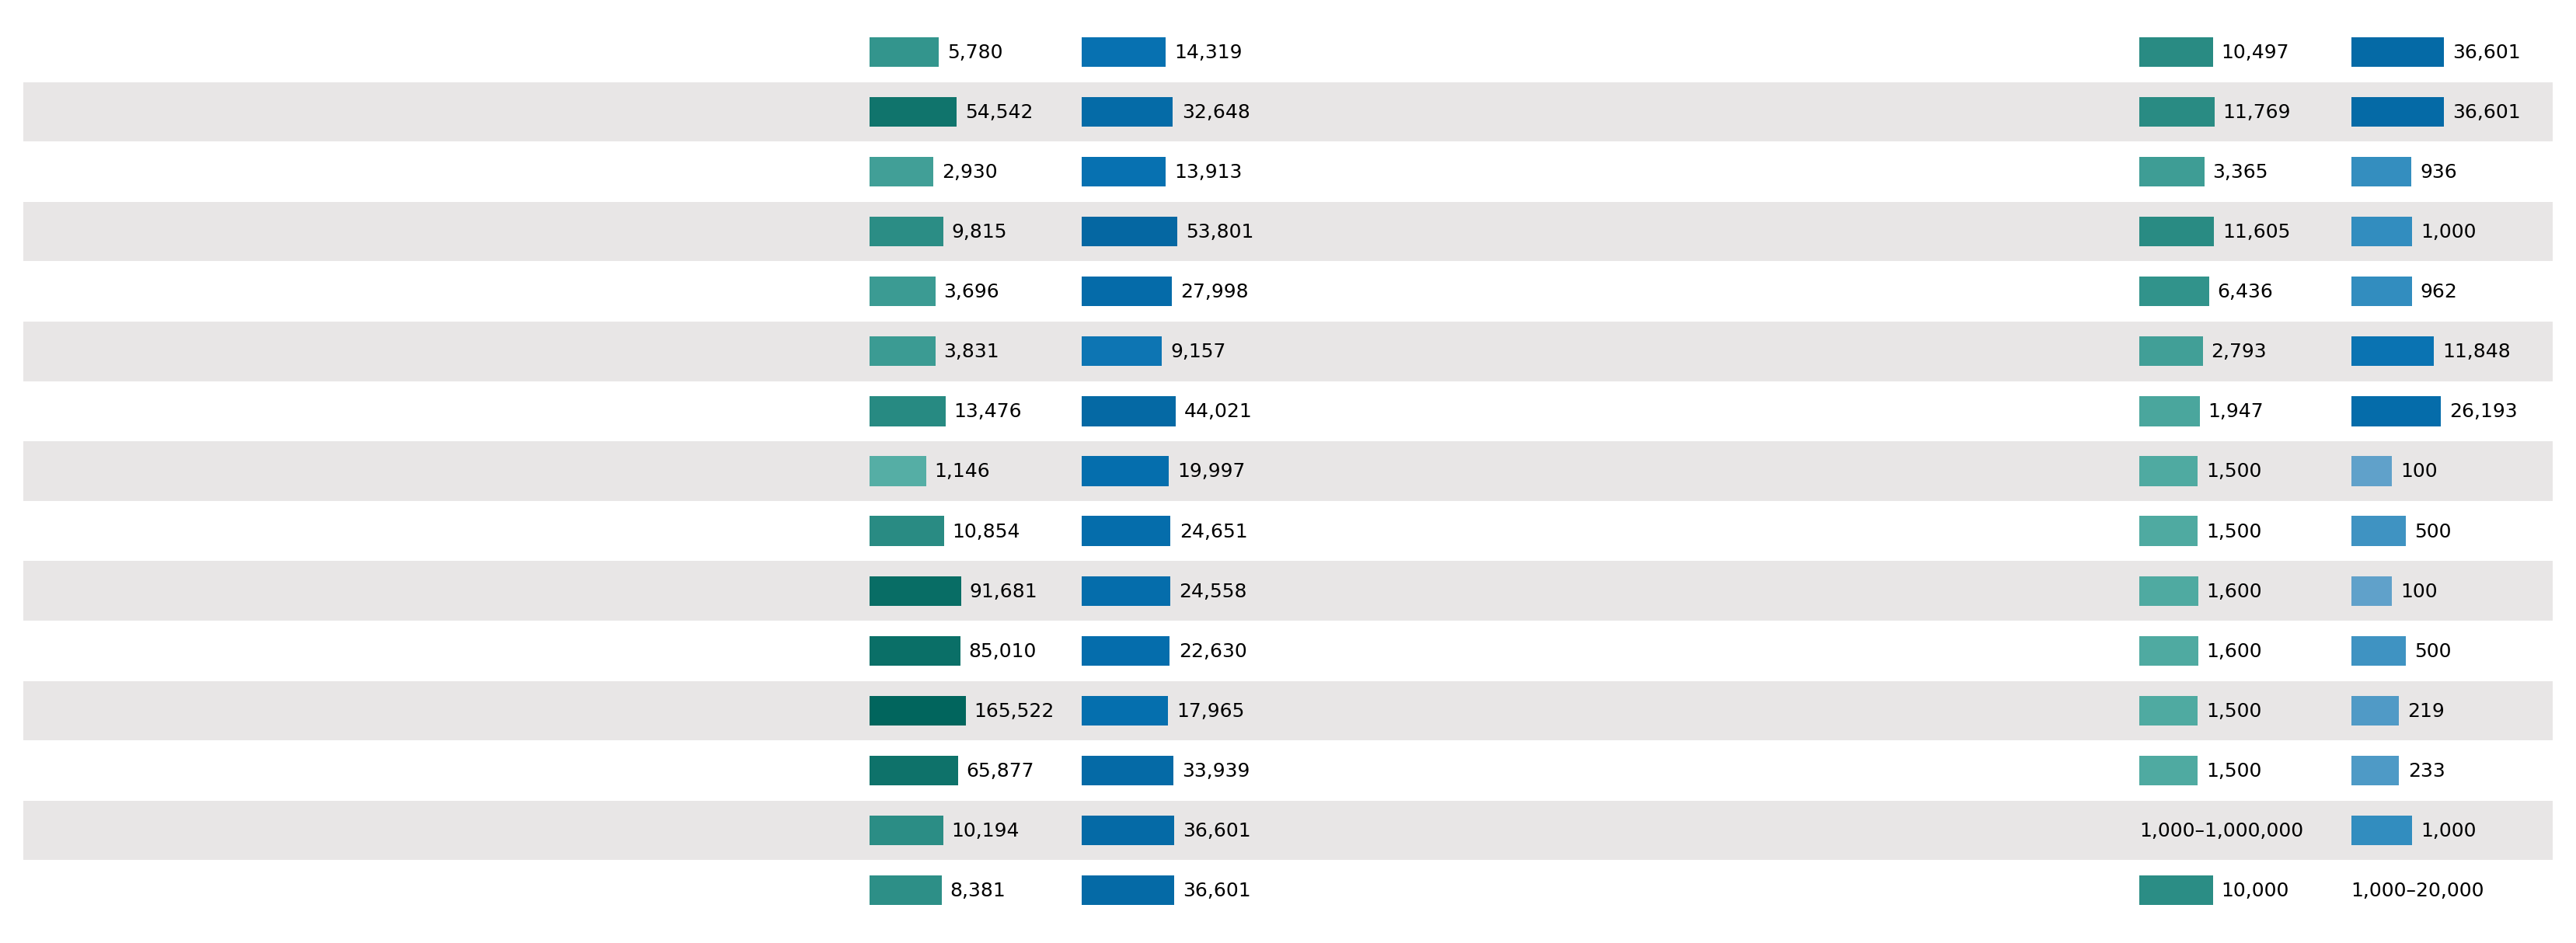

In [9]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Rectangle
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import pandas as pd
import numpy as np



def draw_grid_with_log_bars(
    df,
    nrows: int = 15,
    ncols: int = 12,
    figsize: tuple = (14, 6),
    dpi: int = 300,
    row_bg_light: str = "#FFFFFF",
    row_bg_dark: str = "#E8E6E6",
):
    fig = plt.figure(figsize=figsize, dpi=dpi)
    gs = GridSpec(nrows, ncols, figure=fig, wspace=0.05, hspace=0.01)

    for i in range(nrows):
        bbox = gs[i, :].get_position(fig)
        band_color = row_bg_light if (i % 2 == 0) else row_bg_dark
        fig.patches.append(
            Rectangle(
                (bbox.x0, bbox.y0),
                bbox.width,
                bbox.height,
                transform=fig.transFigure,
                color=band_color,
                zorder=-50,
                lw=0,
            )
        )

    axes = []
    for r in range(nrows):
        row_axes = []
        for c in range(ncols):
            ax = fig.add_subplot(gs[r, c])
            ax.axis("off")
            row_axes.append(ax)
        axes.append(row_axes)

    cmap_cell = cm.get_cmap("BrBG")
    cmap_cell = mcolors.ListedColormap(cmap_cell(np.linspace(0.55, 0.9, 256)))

    cmap_gene = cm.get_cmap("PuBu")
    cmap_gene = mcolors.ListedColormap(cmap_gene(np.linspace(0.35, 0.8, 256)))

    log_cell = np.log1p(df["cell"])
    log_gene = np.log1p(df["gene"])

    norm_cell = mcolors.Normalize(vmin=log_cell.min(), vmax=log_cell.max())
    norm_gene = mcolors.Normalize(vmin=log_gene.min(), vmax=log_gene.max())

    xlim_cell = log_cell.max() * 2.1
    xlim_gene = log_gene.max() * 2.1

    for i in range(15):
        val_cell = df.loc[i, "cell"]
        ax_cell = axes[i][4]
        if val_cell > 0:
            log_val_cell = np.log1p(val_cell)
            color_cell = cmap_cell(norm_cell(log_val_cell))
            ax_cell.barh([0], [log_val_cell], color=color_cell, height=0.1)
            ax_cell.text(
                log_val_cell + 1,
                0,
                f"{val_cell:,}",
                va="center",
                ha="left",
                fontsize=6,
            )
        ax_cell.set_xlim(0, xlim_cell)
        ax_cell.set_ylim(-0.1, 0.1)
        ax_cell.axis("off")

        val_gene = df.loc[i, "gene"]
        ax_gene = axes[i][5]
        if val_gene > 0:
            log_val_gene = np.log1p(val_gene)
            color_gene = cmap_gene(norm_gene(log_val_gene))
            ax_gene.barh([0], [log_val_gene], color=color_gene, height=0.1)
            ax_gene.text(
                log_val_gene + 1,
                0,
                f"{val_gene:,}",
                va="center",
                ha="left",
                fontsize=6,
            )
        ax_gene.set_xlim(0, xlim_gene)
        ax_gene.set_ylim(-0.1, 0.1)
        ax_gene.axis("off")

    for i in range(15):
        idx = i + 15

        val_cell = df.loc[idx, "cell"]
        ax_cell = axes[i][10]
        if val_cell > 0:
            log_val_cell = np.log1p(val_cell)
            color_cell = cmap_cell(norm_cell(log_val_cell))
            ax_cell.barh([0], [log_val_cell], color=color_cell, height=0.1)
            ax_cell.text(
                log_val_cell + 1,
                0,
                f"{val_cell:,}",
                va="center",
                ha="left",
                fontsize=6,
            )
        elif val_cell == 0:
            ax_cell.text(
                0,
                0,
                "1,000\u20131,000,000",
                va="center",
                ha="left",
                fontsize=6,
            )
        ax_cell.set_xlim(0, xlim_cell)
        ax_cell.set_ylim(-0.1, 0.1)
        ax_cell.axis("off")

        val_gene = df.loc[idx, "gene"]
        ax_gene = axes[i][11]
        if val_gene > 0:
            log_val_gene = np.log1p(val_gene)
            color_gene = cmap_gene(norm_gene(log_val_gene))
            ax_gene.barh([0], [log_val_gene], color=color_gene, height=0.1)
            ax_gene.text(
                log_val_gene + 1,
                0,
                f"{val_gene:,}",
                va="center",
                ha="left",
                fontsize=6,
            )
        elif val_gene == 0:
            ax_gene.text(
                0,
                0,
                "1,000\u201320,000",
                va="center",
                ha="left",
                fontsize=6,
            )
        ax_gene.set_xlim(0, xlim_gene)
        ax_gene.set_ylim(-0.1, 0.1)
        ax_gene.axis("off")

    plt.tight_layout()
    return fig


fig = draw_grid_with_log_bars(data, figsize=(14, 5))
plt.savefig("data_summary.svg", bbox_inches="tight")
fig.show()
